# Reading data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('articles_bbc_2018_01_30.csv')

In [3]:
data.shape

(309, 2)

In [4]:
data = data.dropna().reset_index(drop=True)

In [5]:
data.shape

(308, 2)

# Cleaning

#### Keeping English articles

In [6]:
from langdetect import detect
#from tqdm import tqdm_notebook
#tqdm_notebook().pandas()

In [7]:
# Ri-crea la colonna 'lang' usando il detector per capire che lingua è
# (risolvendo possibili entry sbagliate)
#data['lang'] = data.articles.progress_map(detect)
data['lang'] = pd.Series([detect(article) for article in data.articles])

In [8]:
data.lang.value_counts()

en    257
fa      9
fr      7
id      5
vi      4
ru      4
uk      4
ar      4
hi      4
sw      3
tr      2
pt      2
es      2
de      1
Name: lang, dtype: int64

In [9]:
# Mi tengo solo quelli inglesi
data = data.loc[data.lang=='en']
data.shape

(257, 2)

#### Tokenization

In [10]:
from nltk.tokenize import sent_tokenize

In [11]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lorenzocorti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/lorenzocorti/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lorenzocorti/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lorenzocorti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
'''
>> punkt: divide in frasi il testo per costruire un modello per abbreviazioni,
collocations (come le parole sono abbinate) e parole con cui si iniziano frasi.

>> averaged_perceptron_tagger: POS tagger

>> wordnet: database lessicale per la lingua inglese

>> stopwords: parole molto comuni come 'the', 'a', ...

'''

"\n>> punkt: divide in frasi il testo per costruire un modello per abbreviazioni,\ncollocations (come le parole sono abbinate) e parole con cui si iniziano frasi.\n\n>> averaged_perceptron_tagger: POS tagger\n\n>> wordnet: database lessicale per la lingua inglese\n\n>> stopwords: parole molto comuni come 'the', 'a', ...\n\n"

In [13]:
data.head()

,articles,lang
0,Image copyright PA/EPA Image caption Oligarch ...,en
1,Husband admits killing French jogger\r\n\r\nTh...,en
2,Media playback is unsupported on your device M...,en
3,Manchester City's Leroy Sane is ruled out for ...,en
4,Image copyright AFP Image caption Sebastien Br...,en


In [14]:
#data['sentences'] = data.articles.progress_map(sent_tokenize) # divido in frasi
#data['sentences'] = pd.Series([sent_tokenize(article) for article in data.articles])
data['sentences'] = data.articles.map(sent_tokenize)
#data['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of the 1st article

In [15]:
data.head()

,articles,lang,sentences
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...
1,Husband admits killing French jogger\r\n\r\nTh...,en,[Husband admits killing French jogger\r\n\r\nT...
2,Media playback is unsupported on your device M...,en,[Media playback is unsupported on your device ...
3,Manchester City's Leroy Sane is ruled out for ...,en,[Manchester City's Leroy Sane is ruled out for...
4,Image copyright AFP Image caption Sebastien Br...,en,[Image copyright AFP Image caption Sebastien B...


In [16]:
from nltk.tokenize import word_tokenize

In [17]:
data['tokens_sentences'] = data['sentences'].map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
# trasformo le frasi in liste di parole isolate
#print(data['tokens_sentences'].head(1).tolist()[:3])

In [18]:
data.head()

,articles,lang,sentences,tokens_sentences
0,Image copyright PA/EPA Image caption Oligarch ...,en,[Image copyright PA/EPA Image caption Oligarch...,"[[Image, copyright, PA/EPA, Image, caption, Ol..."
1,Husband admits killing French jogger\r\n\r\nTh...,en,[Husband admits killing French jogger\r\n\r\nT...,"[[Husband, admits, killing, French, jogger, Th..."
2,Media playback is unsupported on your device M...,en,[Media playback is unsupported on your device ...,"[[Media, playback, is, unsupported, on, your, ..."
3,Manchester City's Leroy Sane is ruled out for ...,en,[Manchester City's Leroy Sane is ruled out for...,"[[Manchester, City, 's, Leroy, Sane, is, ruled..."
4,Image copyright AFP Image caption Sebastien Br...,en,[Image copyright AFP Image caption Sebastien B...,"[[Image, copyright, AFP, Image, caption, Sebas..."


#### Lemmatizing with POS tagging

In [19]:
from nltk import pos_tag

In [20]:
data['POS_tokens'] = data['tokens_sentences'].map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(data['POS_tokens'].head(1).tolist()[0][:3])
# associo un POS tag ai token

[[('Image', 'NN'), ('copyright', 'NN'), ('PA/EPA', 'NNP'), ('Image', 'NNP'), ('caption', 'NN'), ('Oligarch', 'NNP'), ('Roman', 'NNP'), ('Abramovich', 'NNP'), ('(', '('), ('l', 'NN'), (')', ')'), ('and', 'CC'), ('PM', 'NNP'), ('Dmitry', 'NNP'), ('Medvedev', 'NNP'), ('are', 'VBP'), ('on', 'IN'), ('the', 'DT'), ('list', 'NN'), ('Russian', 'NNP'), ('President', 'NNP'), ('Vladimir', 'NNP'), ('Putin', 'NNP'), ('says', 'VBZ'), ('a', 'DT'), ('list', 'NN'), ('of', 'IN'), ('officials', 'NNS'), ('and', 'CC'), ('businessmen', 'NNS'), ('close', 'RB'), ('to', 'TO'), ('the', 'DT'), ('Kremlin', 'NNP'), ('published', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('US', 'NNP'), ('has', 'VBZ'), ('in', 'IN'), ('effect', 'NN'), ('targeted', 'VBN'), ('all', 'DT'), ('Russian', 'JJ'), ('people', 'NNS'), ('.', '.')], [('The', 'DT'), ('list', 'NN'), ('names', 'RB'), ('210', 'CD'), ('top', 'JJ'), ('Russians', 'NNPS'), ('as', 'IN'), ('part', 'NN'), ('of', 'IN'), ('a', 'DT'), ('sanctions', 'NNS'), ('law', 'NN'), ('aimed', 

In [21]:
# Inspired from https://stackoverflow.com/a/15590384
from nltk.corpus import wordnet

# il POS tagger di nltk è stato allenato con il corpus Treebank e quindi usa
# il set di tag suoi (J, V, N, R). Il pezzetto qui sotto mappa da quei tag a
# quelli di wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() # per avere le forme 'basi' delle parole

In [22]:
# Lemmatizing each word with its POS tag, in each sentence
data['tokens_sentences_lemmatized'] = data['POS_tokens'].map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

In [23]:
data['tokens_sentences_lemmatized'].head(1).tolist()[0][:3]

[['Image',
  'copyright',
  'PA/EPA',
  'Image',
  'caption',
  'Oligarch',
  'Roman',
  'Abramovich',
  '(',
  'l',
  ')',
  'and',
  'PM',
  'Dmitry',
  'Medvedev',
  'be',
  'on',
  'the',
  'list',
  'Russian',
  'President',
  'Vladimir',
  'Putin',
  'say',
  'a',
  'list',
  'of',
  'official',
  'and',
  'businessmen',
  'close',
  'to',
  'the',
  'Kremlin',
  'publish',
  'by',
  'the',
  'US',
  'have',
  'in',
  'effect',
  'target',
  'all',
  'Russian',
  'people',
  '.'],
 ['The',
  'list',
  'names',
  '210',
  'top',
  'Russians',
  'as',
  'part',
  'of',
  'a',
  'sanction',
  'law',
  'aim',
  'at',
  'punish',
  'Moscow',
  'for',
  'meddle',
  'in',
  'the',
  'US',
  'election',
  '.'],
 ['However',
  ',',
  'the',
  'US',
  'stress',
  'those',
  'name',
  'be',
  'not',
  'subject',
  'to',
  'new',
  'sanction',
  '.']]

#### Regrouping tokens and removing stop words

In [24]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('english') + stopwords_verbs + stopwords_other
# rimuovo le stop words: uso quelle fornite dal modulo per l'inglese con anche
# queste qui sopra in più

In [25]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [26]:
# aggiorna i token
data['tokens'] = data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
# fa stopwords removal
data['tokens'] = data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

# ==> Mi ritrovo con 257 (numero di articoli) liste di token ripuliti <==

In [27]:
data['tokens'].head(1).tolist()[0][:30]

['oligarch',
 'roman',
 'abramovich',
 'pm',
 'dmitry',
 'medvedev',
 'list',
 'russian',
 'president',
 'vladimir',
 'putin',
 'list',
 'official',
 'businessmen',
 'close',
 'kremlin',
 'publish',
 'us',
 'effect',
 'target',
 'russian',
 'people',
 'list',
 'names',
 'top',
 'russians',
 'part',
 'sanction',
 'law',
 'aim']

# LDA

## Data preparation

#### Prepare bi-grams and tri-grams

In [28]:
from gensim.models import Phrases

In [29]:
'''data.to_csv("data_test.csv", index = False)'''

'data.to_csv("data_test.csv", index = False)'

In [30]:
'''magheggi = pd.read_csv("data_test.csv")'''

'magheggi = pd.read_csv("data_test.csv")'

In [31]:
tokens = data['tokens'].tolist()
bigram_model = Phrases(tokens) # combina le parole che compaiono comunemente insieme
trigram_model = Phrases(bigram_model[tokens], min_count=1) #stessa cosa ma a livello di (eventuali) tri-gram
tokens = list(trigram_model[bigram_model[tokens]])

In [32]:
for i in range(len(tokens[:20])):
    print(len(tokens[i]))

299
11
260
15
296
109
54
9
364
157
13
283
7
12
40
82
616
454
359
263


#### Prepare objects for LDA gensim implementation

In [33]:
from gensim import corpora

In [34]:
dictionary_LDA = corpora.Dictionary(tokens) # creo un dizionario con le mie parole (ripulite, abbinate, etc...)
dictionary_LDA.filter_extremes(no_below=3) # rimuovo i token che compaiono in meno di 3 documenti (≥ 3 li tengo)

# traformo ogni documento in una bag of words
# ogni documento lista di (numero parola, numero documento)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

## Running LDA

In [35]:
from gensim import models

In [36]:
np.random.seed(123456)
num_topics = 20 # cerco 20 topic
'''
LDA model estimation
- allenato su corpus
- id2word: dizionario con mapping ID -> parola
- passes: training loops
- alpha: probabilità che un topic ci sia in un documento (priori)
- eta: probabilità che una parola sia legata ad un topic
'''
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 1.82 s, sys: 22.3 ms, total: 1.84 s
Wall time: 1.87 s


## Quick exploration of LDA results

#### Looking at topics

In [37]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 0.012*"specie" + 0.010*"prey" + 0.007*"act" + 0.006*"animal" + 0.006*"help" + 0.005*"back" + 0.005*"find" + 0.005*"become" + 0.005*"behaviour" + 0.005*"number" + 0.005*"area" + 0.005*"include" + 0.004*"order" + 0.004*"kill" + 0.004*"approach" + 0.004*"however" + 0.004*"move" + 0.004*"host" + 0.004*"evolve" + 0.004*"well"

1: 0.010*"show" + 0.008*"game" + 0.007*"another" + 0.007*"light" + 0.007*"night" + 0.006*"find" + 0.006*"could" + 0.006*"predator" + 0.006*"animal" + 0.006*"give" + 0.006*"images" + 0.006*"question" + 0.006*"however" + 0.006*"group" + 0.006*"live" + 0.006*"time" + 0.005*"transparent" + 0.005*"drug" + 0.005*"eye" + 0.005*"call"

2: 0.006*"first" + 0.006*"people" + 0.006*"work" + 0.005*"city" + 0.005*"time" + 0.005*"year" + 0.004*"day" + 0.004*"part" + 0.004*"find" + 0.004*"could" + 0.004*"us" + 0.003*"run" + 0.003*"restaurant" + 0.003*"plan" + 0.003*"home" + 0.003*"start" + 0.003*"tunnel" + 0.003*"include" + 0.003*"bring" + 0.003*"dish"

3: 0.014*"separatist" + 0.01

#### Allocating topics to documents

In [38]:
print(data.articles.loc[0][:500])

Image copyright PA/EPA Image caption Oligarch Roman Abramovich (l) and PM Dmitry Medvedev are on the list

Russian President Vladimir Putin says a list of officials and businessmen close to the Kremlin published by the US has in effect targeted all Russian people.

The list names 210 top Russians as part of a sanctions law aimed at punishing Moscow for meddling in the US election.

However, the US stressed those named were not subject to new sanctions.

Mr Putin said the list was an unfr


In [39]:
lda_model[corpus[11]] # ad ogni documento sono stati associati i topic (con le rispettive probabilità)

[(2, 0.6173629), (6, 0.06035658), (10, 0.32138637)]

#### Predicting topics on unseen documents

In [40]:
document = '''Eric Tucker, a 35-year-old co-founder of a marketing company in Austin, Tex., had just about 40 Twitter followers. But his recent tweet about paid protesters being bused to demonstrations against President-elect Donald J. Trump fueled a nationwide conspiracy theory — one that Mr. Trump joined in promoting. 

Mr. Tucker's post was shared at least 16,000 times on Twitter and more than 350,000 times on Facebook. The problem is that Mr. Tucker got it wrong. There were no such buses packed with paid protesters.

But that didn't matter.

While some fake news is produced purposefully by teenagers in the Balkans or entrepreneurs in the United States seeking to make money from advertising, false information can also arise from misinformed social media posts by regular people that are seized on and spread through a hyperpartisan blogosphere.

Here, The New York Times deconstructs how Mr. Tucker’s now-deleted declaration on Twitter the night after the election turned into a fake-news phenomenon. It is an example of how, in an ever-connected world where speed often takes precedence over truth, an observation by a private citizen can quickly become a talking point, even as it is being proved false.'''
tokens = word_tokenize(document)

# Recupero i topics, formattati come stringhe, 20 parole max per ognuno
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
# creo un dataframe con i topic abbinati al documento qui sopra
# per ogni topic recupero il numero, la sua probabilità e le parole associate (topics[el[0]][1])
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

,topic #,weight,words in topic
0,2,0.40,"0.006*""first"" + 0.006*""people"" + 0.006*""work"" ..."
1,8,0.22,"0.012*""us"" + 0.008*""russia"" + 0.007*""could"" + ..."
2,10,0.29,"0.009*""people"" + 0.006*""government"" + 0.006*""u..."
3,17,0.09,"0.010*""idea"" + 0.008*""work"" + 0.008*""link"" + 0..."


## Advanced exploration of LDA results

#### Allocation of topics in all documents

In [41]:
# abbino ogni topic ad un documento
topics = [lda_model[corpus[i]] for i in range(len(data))]

In [42]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [43]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [44]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.998306,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.976827,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.948758,0.0,0.0,0.0,0.0,0.050132,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.973608,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.999021,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [45]:
# Which document are about topic 14
document_topic.sort_values(14, ascending=False)[14].head(20)

248    0.999237
58     0.999117
256    0.997293
15     0.996790
41     0.993013
244    0.992777
218    0.991440
116    0.973609
170    0.963455
163    0.954756
225    0.913619
66     0.816264
161    0.617414
237    0.366401
16     0.294009
34     0.284694
236    0.283281
167    0.143204
252    0.110726
8      0.088888
Name: 14, dtype: float64

In [46]:
print(data.articles.loc[91][:1000])

Image caption Brendan Cole was a professional dancer on Strictly Come Dancing for 13 years

Brendan Cole has announced he will not be returning to Strictly Come Dancing.

The professional dancer revealed during a TV interview on Tuesday that the decision was made by the BBC, saying he was "in shock".

"They made an editorial decision not to have me back on the show," he said on ITV's Lorraine.

A spokesman for the BBC One show thanked Cole for "being part of the show since the beginning" and contributing to its success.

'Emotional and raw'

Cole said: "I'm a little bit in shock at the moment.

"I'm quite emotional and a bit raw about it. I am very disappointed. It's an editorial decision. I will never know the ins and outs.

"I have had 15 incredible series on the show, I'm very proud of the whole show, they're a great team."

Media playback is unsupported on your device Media caption In an interview on 16 January, Brendan Cole told 5 live he wanted to return to Stri


#### Looking at the distribution of topics in all documents

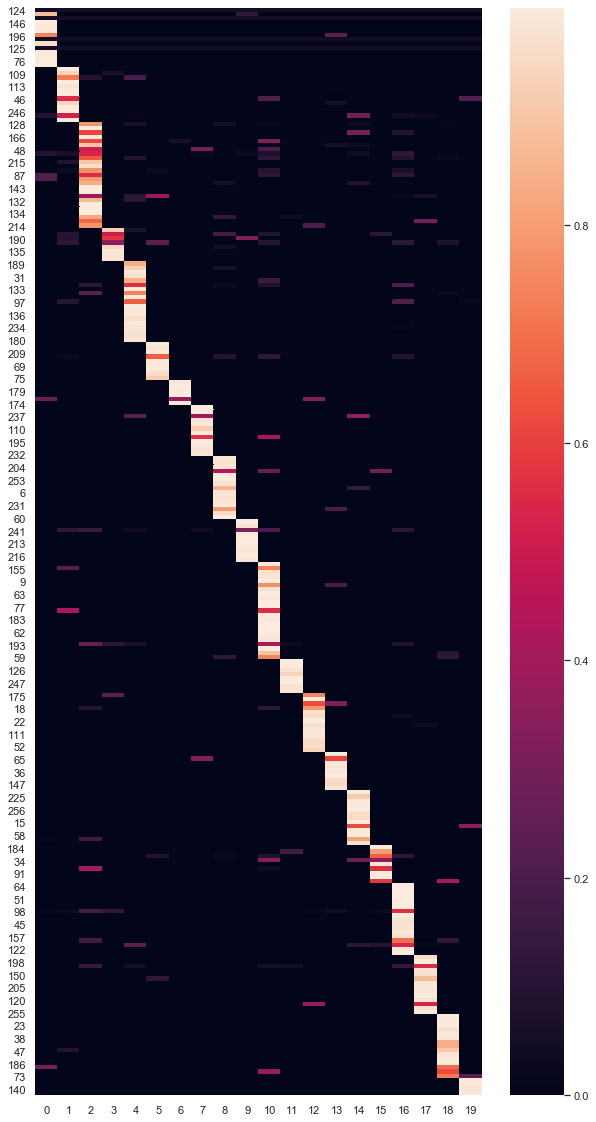

In [47]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

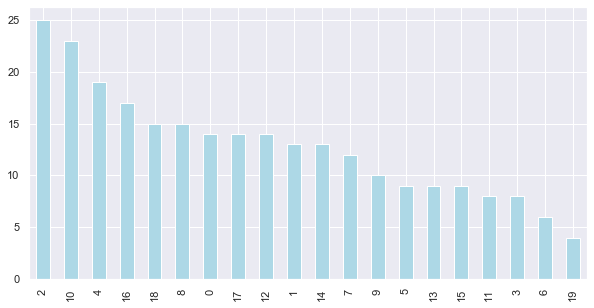

In [48]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

#### Visualizing topics

In [49]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Users/lorenzocorti/opt/anaconda3/envs/research/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))
